<a href="https://colab.research.google.com/github/ModelCrafter/Glass_classifier/blob/main/Glass_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import files


In [3]:
uploaded = files.upload()

Saving glass.csv to glass.csv


In [4]:
#load data
df = pd.read_csv('glass.csv')

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


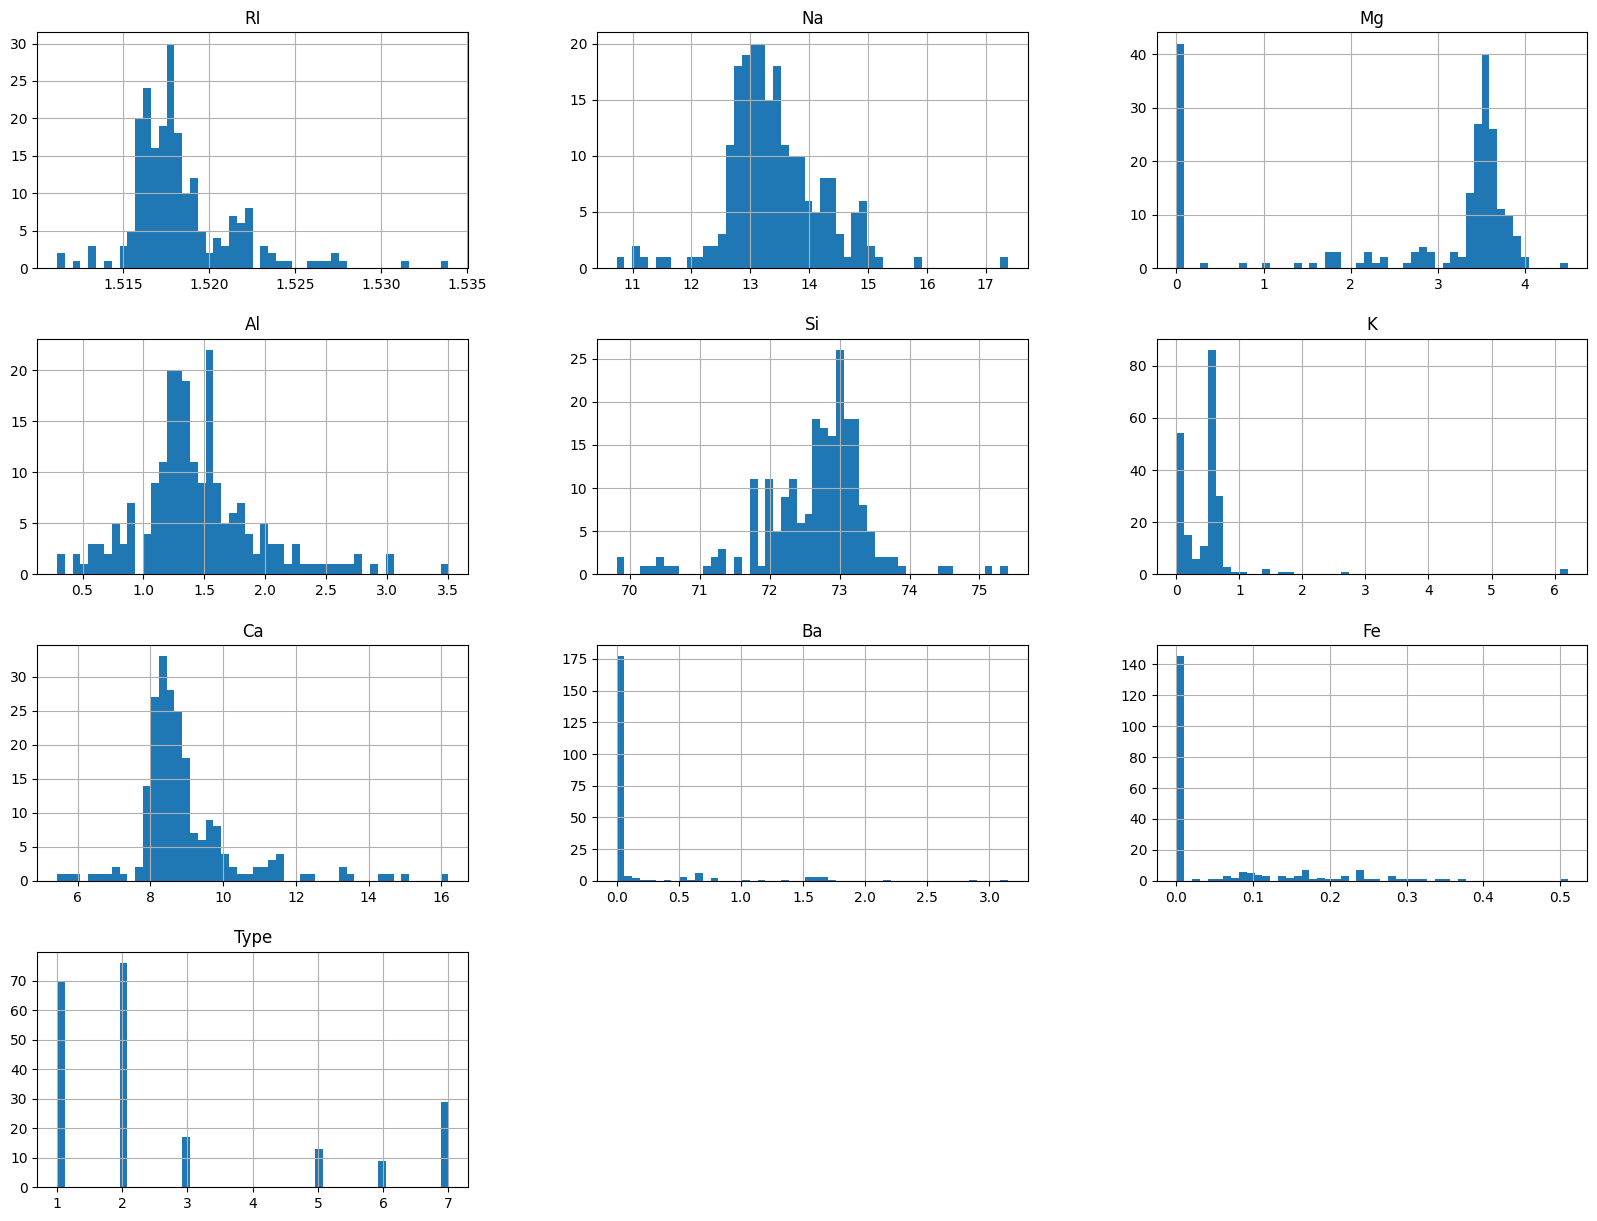

In [5]:
#draw the data
df.hist(bins=50, figsize=(20,15))
#check if any row is null
df.isnull().sum()


In [6]:
#extra code* , Relationships between columns and each other
corr_matrix = df.corr()
corr_matrix['Type'].sort_values(ascending=False) #Al is the most Positive value , Mg is the most Negative value

,Type
Type,1.000000
Al,0.598829
Ba,0.575161
Na,0.502898
Si,0.151565
Ca,0.000952
K,-0.010054
RI,-0.164237
Fe,-0.188278
Mg,-0.744993


In [9]:
#some edits
#some edits
df['Al/Mg Ratio'] = df['Al'] / df['Mg'].replace(0, np.nan) # Replace 0 with NaN to avoid inf
# If you want to fill NaN with a specific value, you can use .fillna() after replace
df['Al/Ba Ratio'] = df['Al'] / df['Ba'].replace(0, np.nan)
df['Al/Ca Ratio'] = df['Al'] / df['Ca'].replace(0, np.nan)
df['Al/Fe Ratio'] = df['Al'] / df['Fe'].replace(0, np.nan)


In [10]:
x = df.drop('Type' , axis=1)
y = df['Type']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)
x_train.fillna(x_train.mean() , inplace=True)
x_test.fillna(x_test.mean() , inplace=True)

In [11]:
#machine learing
cls = RandomForestClassifier(n_estimators=100 , random_state=42)

cls.fit(x_train , y_train)
y_pred = cls.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


##cross val

scores = cross_val_score(cls , x_train , y_train , cv=5)
print(scores)
print("AVG(Accuracy): {:.2f}%".format(scores.sum()/len(scores)*100))

'''
we can use Grid Search to find the best hyperparameters for our model.
But I will foucs on deep learning
'''


Accuracy: 81.40%
[0.68571429 0.64705882 0.82352941 0.85294118 0.64705882]
AVG(Accuracy): 73.13%


'\nwe can use Grid Search to find the best hyperparameters for our model.\nBut I will foucs on deep learning\n'

In [12]:
#deep, some modify on data
tf.random.set_seed(42)
print(y_train.nunique()) # to determine shape of output (softmax)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_train.shape)


6
(171, 8)


In [1]:
#deep


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(8 , activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])
model.summary()
model.layers[0].adapt(x_train.values)

NameError: name 'tf' is not defined

In [45]:
history = model.fit(x_train , y_train , epochs=100 , validation_data=(x_test , y_test))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.1680 - loss: 2.0724 - val_accuracy: 0.1628 - val_loss: 2.0404
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2588 - loss: 2.0051 - val_accuracy: 0.3488 - val_loss: 1.9825
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3789 - loss: 1.9427 - val_accuracy: 0.4651 - val_loss: 1.9285
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4377 - loss: 1.8846 - val_accuracy: 0.5581 - val_loss: 1.8777
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4802 - loss: 1.8301 - val_accuracy: 0.5581 - val_loss: 1.8296
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5098 - loss: 1.7789 - val_accuracy: 0.5814 - val_loss: 1.7839
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5313 - loss: 1.7305 - val_accuracy: 0.6047 - val_loss: 1.7402
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5398 - loss: 1.6849 - val_accuracy: 0.6047 - val_loss

<Axes: >

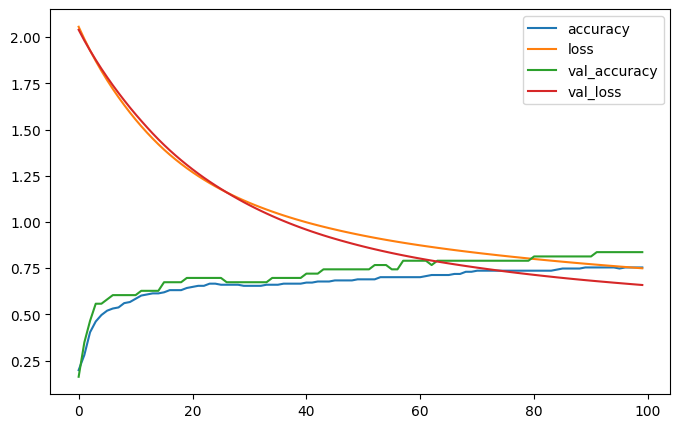

In [46]:
df_hist = pd.DataFrame(history.history)
df_hist.plot(figsize=(8,5))

In [26]:
#fine-tuning
#!pip install keras-tuner to dowload it
import keras_tuner as kt
def bulid_model(hp):
    n_hidden = hp.Int('n_hidden' , min_value=1 , max_value=10)
    n_neurons = hp.Int('n_neurons' , min_value=16 , max_value=256 , step=16)
    learning_rate = hp.Float('learning_rate' , min_value=1e-4 , max_value=1e-2 , sampling='log')
    optimizer = hp.Choice('optimizer' , values=['sgd' , 'adam'])
    activation = hp.Choice('activation' , values=['relu' , 'tanh'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)



    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(x_train.shape[1],)))
    model.add(tf.keras.layers.Normalization())
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons , activation=activation))
    model.add(tf.keras.layers.Dense(8 , activation='softmax'))
    model.compile(loss='categorical_crossentropy' , optimizer=optimizer , metrics=['accuracy'])
    return model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [31]:
random_serach = kt.RandomSearch(bulid_model ,objective='val_accuracy' , max_trials=20 , overwrite=True ,directory='my_glass_classifier' , project_name='rnd_serach' , seed=42 )
random_serach.search(x_train , y_train , epochs=40 , validation_data=(x_test , y_test))

Trial 20 Complete [00h 00m 06s]
val_accuracy: 0.39534884691238403

Best val_accuracy So Far: 0.8139534592628479
Total elapsed time: 00h 02m 24s


In [50]:
top_3 = random_serach.get_best_models(num_models=3)
top = top_3[0]
print(top)




<Sequential name=sequential, built=True>


In [41]:
top_3h = random_serach.get_best_hyperparameters(num_trials=3)
top_h = top_3h[0].values
print(top_h)

{'n_hidden': 5, 'n_neurons': 128, 'learning_rate': 0.0009294745699713808, 'optimizer': 'adam', 'activation': 'tanh'}


In [60]:
pred = top.predict(x_test[:30])
pred = np.argmax(pred , axis=1)
y_test_oneD = np.argmax(y_test[:30] , axis=1) #to  convect y from 8 D to 1D
print(accuracy_score(y_test_oneD , pred ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.8666666666666667
